In [26]:
!pip install pycaret[full]==2.3.5

  Using cached pycaret-2.3.5-py3-none-any.whl.metadata (11 kB)
  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [39]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
# Upload file
from google.colab import files
uploaded = files.upload()

Saving basket_analysis.csv to basket_analysis (5).csv


In [41]:
# Load the dataset
data = pd.read_csv('basket_analysis.csv')

In [43]:
print(data.head())

   Unnamed: 0  Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Ice cream  \
0           0  False   True   False   False   True   True  False       True   
1           1  False  False   False   False  False  False  False      False   
2           2   True  False    True   False  False   True  False       True   
3           3  False  False    True    True  False   True  False      False   
4           4   True   True   False   False  False  False  False      False   

   Kidney Beans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
0         False  False   False  False   True    False    True       True  
1         False   True   False  False  False    False   False      False  
2         False   True   False  False  False    False    True       True  
3         False   True    True   True  False    False   False      False  
4         False  False   False  False  False    False   False      False  


In [44]:
print(data.columns)

Index(['Unnamed: 0', 'Apple', 'Bread', 'Butter', 'Cheese', 'Corn', 'Dill',
       'Eggs', 'Ice cream', 'Kidney Beans', 'Milk', 'Nutmeg', 'Onion', 'Sugar',
       'Unicorn', 'Yogurt', 'chocolate'],
      dtype='object')


In [45]:
# Drop the index column if not needed
data = data.drop(columns=['Unnamed: 0'])

In [46]:
# Convert boolean values to 1 and 0
data_encoded = data.astype(int)

In [47]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(data_encoded, min_support=0.01, use_colnames=True)

In [48]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

In [49]:
# Display the results
print(rules)

                                             antecedents    consequents  \
0                                                (Bread)       (Yogurt)   
1                                            (Ice cream)       (Butter)   
2                                                 (Dill)    (chocolate)   
3                                                 (Milk)    (chocolate)   
4                                            (chocolate)         (Milk)   
...                                                  ...            ...   
39492  (Unicorn, Yogurt, chocolate, Eggs, Milk, Ice c...        (Onion)   
39493    (Unicorn, Yogurt, Onion, Eggs, Milk, Ice cream)    (chocolate)   
39494  (Unicorn, chocolate, Onion, Eggs, Milk, Ice cr...       (Yogurt)   
39495  (Yogurt, chocolate, Onion, Eggs, Milk, Ice cream)      (Unicorn)   
39496      (Unicorn, Yogurt, chocolate, Eggs, Ice cream)  (Onion, Milk)   

       antecedent support  consequent support   support  confidence      lift  \
0                0

In [50]:
# Save the rules to a CSV file
rules.to_csv('association_rules.csv', index=False)

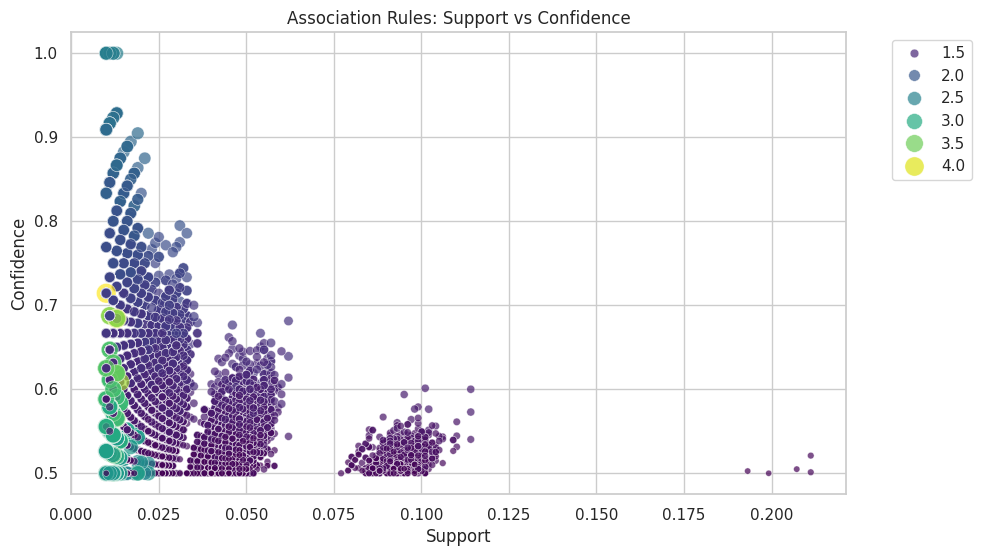

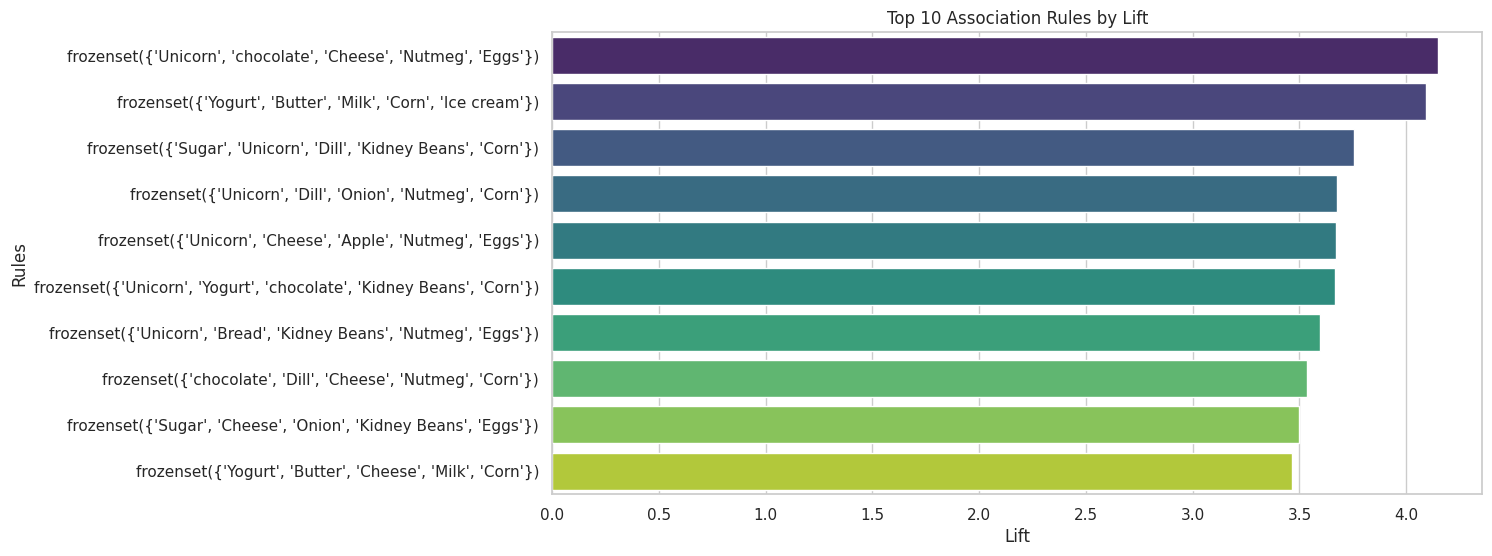

In [51]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20, 200), hue='lift', palette='viridis', alpha=0.7)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Bar plot of the top 10 rules by lift
top_rules = rules.nlargest(10, 'lift')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rules, x='lift', y='antecedents', palette='viridis')
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()

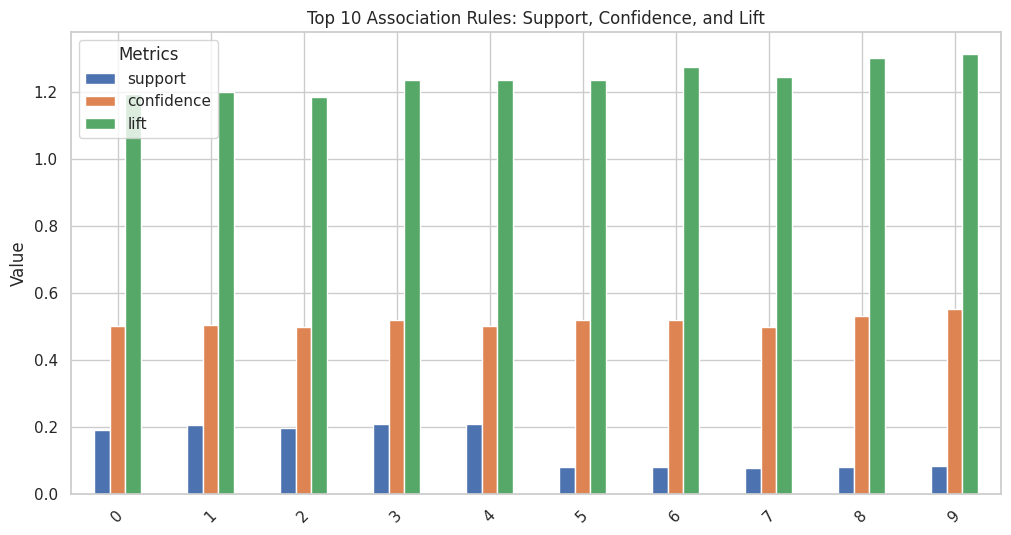

In [52]:
# Create a new DataFrame with the metrics you want to visualize
metrics = rules[['support', 'confidence', 'lift']].head(10)  # Top 10 rules for better visibility

# Plotting the metrics
metrics.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Association Rules: Support, Confidence, and Lift')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()